In [1]:
import numpy as np
import tensorflow as tf

2023-01-26 05:10:11.387553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 05:10:11.495078: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


랜덤시드 설정

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

데이터 불러오기 및 Original Data 차원 확인

In [3]:
from tensorflow.keras import datasets
(X_train0, y_train0), (X_test0, y_test) = datasets.imdb.load_data(num_words=2000)
# imdb 영화감상 데이터를 불러오며 자주 사용되는 2000개를 사용한다. 

In [4]:
print(X_train0.shape, y_train0.shape)
print(X_test0.shape, y_test.shape)
# train, test데이터 모두 25000개의 데이터로 구성되어 있음을 알 수 있음

(25000,) (25000,)
(25000,) (25000,)


training, validation set 분리

In [5]:
X_train, y_train = X_train0[0:20000], y_train0[0:20000]
X_valid, y_valid = X_train0[20000:25000], y_train0[20000:25000]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(20000,) (20000,)
(5000,) (5000,)


feature data 형태 확인

In [6]:
print(X_train[0])

# 개별 feature 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
189


target class 확인

In [7]:
print(set(y_test))
# 출력 결과는 0과 1의 2개의 클래스로 이루어진 이진분류문제임을 알 수 있다. (0은 부정리뷰, 1은 긍정리뷰)

{0, 1}


feature data 변형 - 제각기 다른 feauture data의 길이를 일치시켜야 한다.

In [8]:
# data의 길이를 맞출 때는 sequence를 이용한다. 
from tensorflow.keras.preprocessing import sequence

# pad_sequences함수를 이용해 길이를 100으로 맞춘다.(maxlen을 조정해 길이를 바꿀 수 있음)
# 길이가 100을 넘으면 나머지는 삭제, 길이가 100이 안되면 0으로 채운다.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_valid = sequence.pad_sequences(X_valid, maxlen = 100)
X_test = sequence.pad_sequences(X_test0, maxlen = 100)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


LSTM model 생성

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D

input = Input(shape=(None,))

# Embedding을 이용해 단어 임베딩 층을 추가
#input_dim은 총 단어의 개수(2000개), output_dim은 각 데이터값의 길이
x = Embedding(input_dim=2000, output_dim=100)(input)
x = Conv1D(50, 3, padding='valid', activation='relu')(x)
x = MaxPooling1D(pool_size=3)(x)
x = LSTM(100, activation='tanh')(x)
x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(input, output)
model.summary()

2023-01-26 05:10:15.980881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 05:10:15.982953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 05:10:15.983095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 05:10:15.983403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 50)          15050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                             

Model 컴파일

In [10]:
# 이진분류문제이므로 loss='binary_crossentropy'로 하고, 모델 평가는 accuracy로 한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

학습 (validation data로 학습)

In [11]:
hist = model.fit(X_train, y_train, batch_size=100, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10


2023-01-26 05:10:17.958203: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


200/200 [==============================] - 3s 5ms/step - loss: 0.4910 - accuracy: 0.7474 - val_loss: 0.3867 - val_accuracy: 0.8260
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3426 - accuracy: 0.8537 - val_loss: 0.3723 - val_accuracy: 0.8306
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3005 - accuracy: 0.8758 - val_loss: 0.3669 - val_accuracy: 0.8378
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2575 - accuracy: 0.8990 - val_loss: 0.3964 - val_accuracy: 0.8286
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1987 - accuracy: 0.9275 - val_loss: 0.4302 - val_accuracy: 0.8238
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1251 - accuracy: 0.9586 - val_loss: 0.4751 - val_accuracy: 0.8230
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.6071 - val_accuracy: 0.8206
Epoch 8/10
200/20

Model 평가 _ accuracy

In [12]:
print(model.evaluate(X_train, y_train)[1])  # training data에 의한 정확도
print(model.evaluate(X_valid, y_valid)[1])  # validation data에 의한 정확도
print(model.evaluate(X_test, y_test)[1])    # test data에 의한 정확도

625/625 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9987
0.9987000226974487
157/157 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.8160
0.8159999847412109
782/782 [==============================] - 1s 2ms/step - loss: 0.8443 - accuracy: 0.8210
0.8209599852561951


정확도 & 손실 그래프

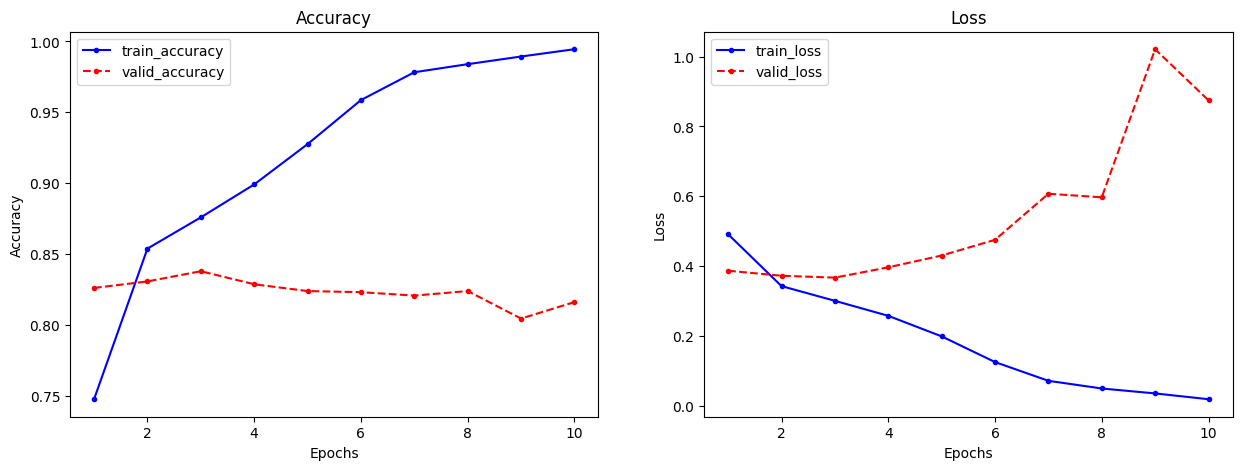

In [13]:
import numpy as np

# plot에서 x축이 될 epoch을 설정
epoch = np.arange(1, 11)    # 학습 시 10단계데 걸쳐 학습시켰기에 1~10까지의 숫자가 필요
acc_train, acc_valid = hist.history['accuracy'], hist.history['val_accuracy']
loss_train, loss_valid = hist.history['loss'], hist.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5)) # plot의 size를 설정

# 정확도와 손실그래프를 한꺼번에 그리기 위해 subplot 설정
# 정확도그래프 subplot
plt.subplot(121)  # plt.subplot(1,2,1)과 같은 의미
plt.plot(epoch, acc_train, 'b', marker='.', label='train_accuracy')     # train 정확도 plot을 그림
plt.plot(epoch, acc_valid, 'r--', marker='.', label='valid_accuracy')   # validaition 정확도 plot 추가
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실그래프 subplot
plt.subplot(122)  # plt.subplot(1,2,2)와 같은 의미
plt.plot(epoch, loss_train, 'b', marker='.', label='train_loss')
plt.plot(epoch, loss_valid, 'r--', marker='.', label='valid_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()